# Real Time Filtering of Malicious URLs

The main aim of this project is to built a lightweight filtering system to filter out the
harmful URLs by using Machine Learning Algorithms and methodologies.

The project has three main modules 


1.   Pre-Processing
2.   Building Machine Learning Models and Testing
3.   Real Time Filtering



# Loading the dataset
The dataset used for this project is taken from Kaggle. This link is https://www.kaggle.com/xwolf12/malicious-and-benign-websites

In [ ]:
#importing the pandas and numpy libraries

#pandas is used for data processing
import pandas as pd

#numpy is used for mathematical operations
import numpy as np

In [ ]:
#loading the dataset
df = pd.read_csv("/content/dataset.csv")

In [ ]:
#viewing the data
df.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,11,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,1,62,146,2,2.0,1


# Pre-Processing
The different pre-processing steps done are

1.   Feature Selection: Only 6 features were selected for the training of the models. These features were selected based on the covariance value with the output label.
2.   Tokenization: Converting the strings to numeric tokens
3.   Normalization: Since the range of the numeric data is very large, the variance increases and this affects the training process. To reduce variance, Normalization is done.



## Feature Selection

In [ ]:
#getting all the column names
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [ ]:
#total number of columns in the dataframe
len(df.columns)

21

In [ ]:
#selecting particular columns
df_part= df[['NUMBER_SPECIAL_CHARACTERS','SERVER','CONTENT_LENGTH','WHOIS_STATEPRO','DIST_REMOTE_TCP_PORT','REMOTE_IPS','Type' ]]

In [ ]:
#viewing the modified dataset
df_part.head(5)

,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_STATEPRO,DIST_REMOTE_TCP_PORT,REMOTE_IPS,Type
0,7,nginx,263.0,None,0,2,1
1,6,Apache/2.4.10,15087.0,None,7,4,0
2,6,Microsoft-HTTPAPI/2.0,324.0,None,0,0,0
3,6,nginx,162.0,AK,22,3,0
4,6,None,124140.0,TX,2,5,0


## Tokenization

In [ ]:
#mapping the server name strings to integers or tokens

#getting the unique server names
server_names = df.SERVER.unique()

#creating a map between the server name and token
server_names_map = {k:v for v,k in enumerate(server_names)}

In [ ]:
#getting the unique state names
state_names = df.WHOIS_STATEPRO.unique()

#creating a map between the state name and token
state_names_map = {k:v for v,k in enumerate(state_names)}

In [ ]:
 #applying the server map to the dataframe
 df_part.SERVER = df_part.SERVER.apply(lambda x: server_names_map[x])

In [ ]:
#applying the state map to the dataframe
df_part.WHOIS_STATEPRO = df_part.WHOIS_STATEPRO.apply(lambda x: state_names_map[x])

In [ ]:
#making the NaN values as 0
df_part['CONTENT_LENGTH'] = df_part['CONTENT_LENGTH'].fillna(0)

#making the content_length column as type int
df_part['CONTENT_LENGTH'] = df_part['CONTENT_LENGTH'].astype('int')

In [ ]:
#viewing the updated dataset
df_part.head(5)

,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_STATEPRO,DIST_REMOTE_TCP_PORT,REMOTE_IPS,Type
0,7,0,263,0,0,2,1
1,6,1,15087,0,7,4,0
2,6,2,324,0,0,0,0
3,6,0,162,1,22,3,0
4,6,3,124140,2,2,5,0


In [ ]:
#Splitting into X and y

X = df_part.iloc[:, :-1]
y = df_part.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

#splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaling the values in X_train
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building Machine Learning models and Testing
Three machine learning models were developed to compare and contrast the results of the different models.
Three ML models were developed


1.   Multi Layer Perceptron
2.   Random Forest Classifier
3.   Support Vector Machine



## Random Forest Classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#defining the Random Forest model with 30 decision trees
classifier = RandomForestClassifier(n_estimators=30, random_state=42)

#training the model with the training set
classifier.fit(X_train, y_train)

#prediciting the outputs on the test set
y_pred = classifier.predict(X_test)

### Evaluation Metrics

In [ ]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       316
           1       0.89      0.80      0.85        41

    accuracy                           0.97       357
   macro avg       0.93      0.90      0.91       357
weighted avg       0.97      0.97      0.97       357

0.9663865546218487


In [ ]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


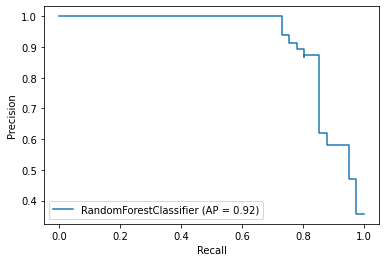

In [ ]:
#plotting the PR curve
disp_rf = plot_precision_recall_curve(classifier, X_test, y_test)


## Multi Layer Perceptron

In [ ]:
#importing the libraries
import tensorflow as tf
import keras

In [ ]:
#defining the ML model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/30
41/41 [==============================] - 0s 4ms/step - loss: 0.1938 - accuracy: 0.9204 - val_loss: 0.2132 - val_accuracy: 0.9231
Epoch 2/30
41/41 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9219 - val_loss: 0.2129 - val_accuracy: 0.9091
Epoch 3/30
41/41 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9219 - val_loss: 0.2126 - val_accuracy: 0.9161
Epoch 4/30
41/41 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9188 - val_loss: 0.2103 - val_accuracy: 0.9161
Epoch 5/30
41/41 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9235 - val_loss: 0.2078 - val_accuracy: 0.9231
Epoch 6/30
41/41 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9282 - val_loss: 0.2057 - val_accuracy: 0.9231
Epoch 7/30
41/41 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9274 - val_loss: 0.2053 - val_accuracy: 0.9091
Epoch 8/30
41/41 [==

In [ ]:
#predicting on the test set
y_pred_mlp = model.predict_classes(X_test)

### Evaluation Metrics

In [ ]:
print(accuracy_score(y_test, y_pred_mlp))

0.9327731092436975


In [ ]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       316
           1       0.73      0.66      0.69        41

    accuracy                           0.93       357
   macro avg       0.84      0.81      0.83       357
weighted avg       0.93      0.93      0.93       357



In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
mlp_pred_proba = model.predict(X_test)

In [ ]:
prec, recall , _ = precision_recall_curve(y_test, mlp_pred_proba)

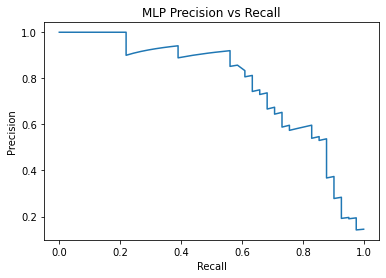

In [ ]:
import matplotlib.pyplot as plt
plt.plot(recall, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("MLP Precision vs Recall")
plt.show()

## Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
#defining the SVM with the rbf kernel
clf = svm.SVC(kernel='rbf')

#training
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predicting on the test set
y_pred_svm = clf.predict(X_test)

### Evaluation Metrics

In [ ]:
print(accuracy_score(y_test, y_pred_svm))

0.9159663865546218


In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       316
           1       0.92      0.29      0.44        41

    accuracy                           0.92       357
   macro avg       0.92      0.64      0.70       357
weighted avg       0.92      0.92      0.90       357



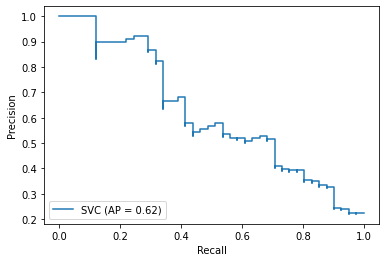

In [ ]:
disp_svm = plot_precision_recall_curve(clf, X_test, y_test)

# Real Time Filtering

This is a small code part to show how the system will be used in real time. Since the Random Forest algorithm had the highest accuracy, we have used it for the demo part. 

In [ ]:
def pred_link(server = "None", whois_state="None",  \
              nos_spl_chars = 0, content_len = 0, \
              remote_ips = 0, remote_tcp=0):
  #tokenizing the server name
  server_token = server_names_map[server]
  
  #tokeninzing the state name
  whois_state_token = state_names_map[whois_state]

  #constructing the input array
  inp_arr = [[nos_spl_chars, server_token, content_len, whois_state_token, remote_tcp, remote_ips]]
  
  #constructing the input for the classifier
  inp_arr = sc.transform(inp_arr)
  
  #final result
  result = classifier.predict(inp_arr)
  if result == 0:
    return "The link is not safe"

  return "The link is safe"



In [ ]:
#actual label 0
pred_link("Microsoft-HTTPAPI/2.0","Arizona", 10, 324, 2,13)

'The link is not safe'

In [ ]:
#actual label 0
pred_link("nginx","PANAMA", 11, 0, 14,46)

'The link is not safe'

In [ ]:
#actual label 1
pred_link("Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL/0.9.8y DAV/2 PHP/5.2.12 with Suhosin-Patch",\
          "Utah", 10, 2516, 2,0)

'The link is safe'

In [ ]:
#actual label 1
pred_link("nginx", "Novosibirskaya obl.",7,686,2,0 )

'The link is safe'

In [ ]:
#actual label 1
pred_link("nginx/1.10.1", "None", 5, 0, 0,0)

'The link is safe'

In [ ]:
#actual label 0
pred_link("None", "None", 7, 13716, 8, 6)

'The link is not safe'